In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=4
paper='1508.00296'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Alright, so I'm given a Hamiltonian equation for a system with two types of atoms labeled N and B, with spin-up and spin-down electrons on each. I'll go through the questions step-by-step and generate the required code.

Let's first analyze the Hamiltonian equation to identify the flavors and basis order.

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I see operators of the form a^†_{k,σ}, a_{k,σ}, b^†_{k,σ}, and b_{k,σ}. Here, 'a' and 'b' denote the two atomic types (N and B), and σ is the spin.

So, my flavor types are:
1. Atom type: N or B (2 types)
2. Spin: ↑ or ↓ (2 types)

The total number of flavors is 2×2 = 4, which can be organized as a tuple D = (2, 2).

Now, I need to decide on a basis order. Following the convention in the example, I will organize the basis as:
0: Atom N, spin ↑
1: Atom N, spin ↓
2: Atom B, spin ↑
3: Atom B, spin ↓

So, our basis order is as follows:
```
Tuple of Flavors (D) = (2,

In [7]:
print(generated_code['thinking'])

Alright, so I'm given a Hamiltonian equation for a system with two types of atoms labeled N and B, with spin-up and spin-down electrons on each. I'll go through the questions step-by-step and generate the required code.

Let's first analyze the Hamiltonian equation to identify the flavors and basis order.

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I see operators of the form a^†_{k,σ}, a_{k,σ}, b^†_{k,σ}, and b_{k,σ}. Here, 'a' and 'b' denote the two atomic types (N and B), and σ is the spin.

So, my flavor types are:
1. Atom type: N or B (2 types)
2. Spin: ↑ or ↓ (2 types)

The total number of flavors is 2×2 = 4, which can be organized as a tuple D = (2, 2).

Now, I need to decide on a basis order. Following the convention in the example, I will organize the basis as:
0: Atom N, spin ↑
1: Atom N, spin ↓
2: Atom B, spin ↑
3: Atom B, spin ↓

So, our basis order is as follows:
```
Tuple of Flavors (D) = (2, 2)
Basis Order:
0: Atom type. Order: N, B
1: Spin. O

In [8]:
print(generated_code['text'])

# ANSWER:

1) Tuple of Flavors (D) = (2, 2)
Basis Order:
0: Atom type. Order: N, B
1: Spin. Order: ↑, ↓

2) EXP-VAL DEPENDENT TERMS: {
    r"\langle b^{\dagger}_{k, \sigma} b_{k, \sigma} \rangle for \sigma=\uparrow": "Mean of `exp_val[2, 2, :]`",
    r"\langle b^{\dagger}_{k, \sigma} b_{k, \sigma} \rangle for \sigma=\downarrow": "Mean of `exp_val[3, 3, :]`",
    r"\langle a^{\dagger}_{k, \sigma} a_{k, \sigma} \rangle for \sigma=\uparrow": "Mean of `exp_val[0, 0, :]`",
    r"\langle a^{\dagger}_{k, \sigma} a_{k, \sigma} \rangle for \sigma=\downarrow": "Mean of `exp_val[1, 1, :]`"
}

TERMS:
- t_N terms: H[0, 0, :] and H[1, 1, :], NI (N atom hopping for ↑ and ↓ spin)
- t_B terms: H[2, 2, :] and H[3, 3, :], NI (B atom hopping for ↑ and ↓ spin)
- t_BN terms: H[0, 2, :], H[2, 0, :], H[1, 3, :], H[3, 1, :], NI (N-B hopping for both spins)
- Δ terms: H[0, 0, :] and H[1, 1, :], NI (energy shift for N atoms)
- U_B term for σ≠σ': H[2, 2, :] and H[3, 3, :], I (B atom interaction between different 

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a square-centered lattice with N atoms at vertices
    and B atoms at centers. Includes hopping and interaction terms.
    
    Args:
        N_shell (int): Number of shells in the Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor, default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'square'   # Square-centered lattice with N at vertices and B at centers
        self.D = (2, 2)  # (atom_type, spin)
        self.basis_order = {'0': 'atom_type', '1': 'spin'}
        # Order:
        # atom_type: N (0), B (1)
        # spin: up (0), down (1)
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0)  # Temperature, default to 0
  

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1508_00296_4.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

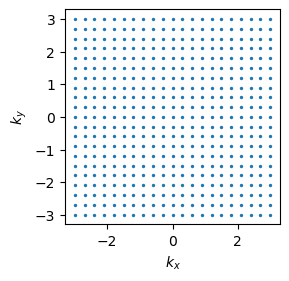

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0},filling_factor=1/2)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

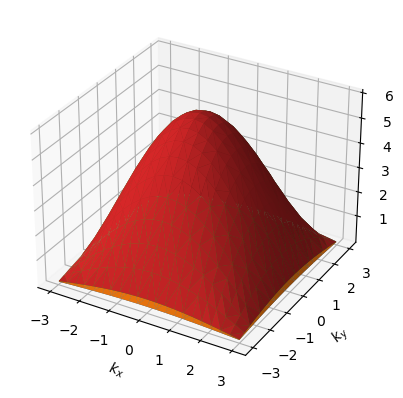

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

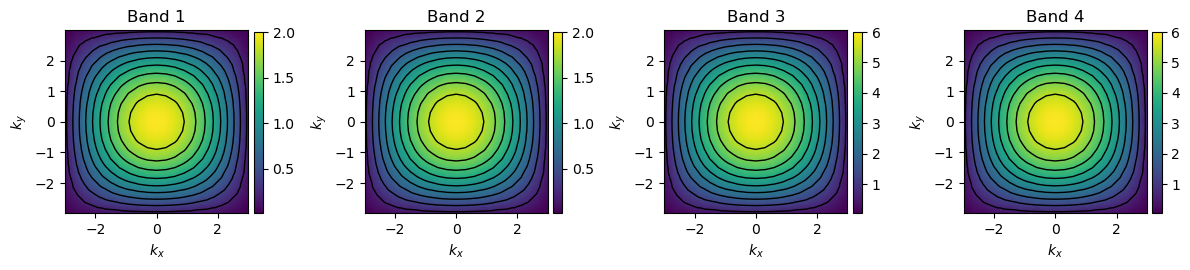

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'V_BN':1e-5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 0


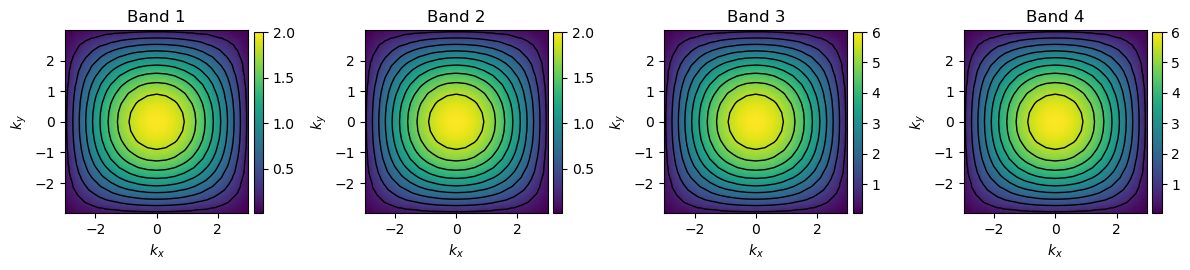

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'V_BN':1e5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
h_nonint[1,1,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 1


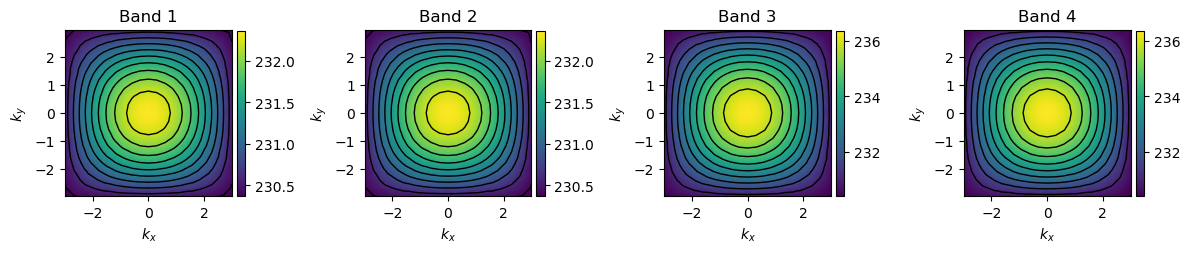

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is -1.97
U/T is 93.82
mean_U is 57.14


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and problem to determine if the momentum space mesh shown is correct for the given Hamiltonian.

From the image:
- It shows a uniform grid of points in momentum space (k-space)
- The x-axis is labeled k_x, ranging from approximately -3 to 3
- The y-axis is labeled k_y, ranging from approximately -3 to 3
- The grid appears to be a square lattice of points in k-space

Let's check this against the rubric:

1. The image should show momentum space mesh in the first Brillouin zone of the concerned problem.

To determine this, I need to analyze what is the appropriate first Brillouin zone for a square-centered lattice.

For a square-centered lattice (also known as a square lattice with a basis):
- The direct lattice has N atoms at the vertices of squares
- B atoms at the centers of the squares

The reciprocal lattice of a square lattice is also a square lattice, and the first Brillouin zone is a square centered at t

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Alright, I am examining a set of band structure plots for a square-centered lattice with N atoms at the vertices and B atoms at the center. Let me analyze these plots according to the rubric.

The image shows four panels labeled "Band 1", "Band 2", "Band 3", and "Band 4", each showing a false color plot with contour lines of the band structure in the first Brillouin zone.

Let's go through the rubric points:

1. Identify the shape of the Brillouin zone boundary:
   - The plots show a square-shaped boundary with k_x and k_y axes ranging approximately from -3 to 3.
   - This is consistent with a square-centered lattice, where the first Brillouin zone is a square.

2. Examine the symmetry of the energy distribution:
   2.1 Highest energy regions (yellow):
      - In all four bands, the highest energy region appears as a circular/symmetric yellow spot at the center of the Brillouin zone (k_x = 0, k_y = 0).
   
   2.2 Pattern of energy va

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper,Gap=0,nu=1/2)
    )


#################### THINKING ####################

I need to evaluate whether the images provided match the expected Hartree-Fock band structure calculation for a square-centered lattice with the given Hamiltonian parameters. Let me go through the rubric points systematically:

1. Identify the shape of the Brillouin zone boundary:
Looking at the four band plots, the Brillouin zone boundary appears to be square, with k_x and k_y both ranging from approximately -3 to +3. This is consistent with a square-centered lattice, where the first Brillouin zone is indeed square-shaped.

2. Examine the symmetry of the energy distribution:

2.1 The highest energy regions (yellow) are centrally located in all bands, at the origin (k_x = 0, k_y = 0).

2.2 The energy variation shows a radially symmetric pattern from the center, decreasing uniformly in all directions toward the edges of the Brillouin zone. The contour lines form concentric square-like shapes.

2.3 Looking at the symmetry, I can observ

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='V_BN = 1e5',nu=1/2)
    )


#################### THINKING ####################

Let me analyze this problem step by step according to the rubric.

I'm given an image showing band structure plots for 4 bands (Band 1 through Band 4) in the first Brillouin zone after a self-consistent Hartree-Fock calculation. I need to analyze these plots based on the Hamiltonian provided.

First, let me understand the Hamiltonian:
- It describes a square-centered lattice with N atoms at the vertices and B atoms at the center of each square
- The operators a and b correspond to N and B atoms respectively
- We have single-particle hopping terms (T) and interaction terms (H^int,Hartree)
- The interaction parameters are U_N=3, V_B=0.65, V_BN=1

Now let's go through the rubric requirements:

1. **Brillouin Zone Boundary Shape**:
   Looking at the plots, the Brillouin zone appears to be square-shaped with k_x and k_y axes ranging from approximately -3 to 3. This is consistent with a square-centered lattice, where we expect a square Bri

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '4' saved to final_answer.yaml
